In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
import pandas as pd
from textblob import TextBlob
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
nltk.download('wordnet')
import re
import matplotlib.pyplot as plt


import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from nltk.tokenize import word_tokenize
from sklearn.preprocessing import StandardScaler

dfrnn = pd.read_csv('/content/drive/MyDrive/BaseDadosBTGM6/sentence_vectors.csv')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [25]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

# Balanceamento dos dados
df_positive = dfrnn[dfrnn['sentimento'] == 0]
df_negative = dfrnn[dfrnn['sentimento'] == 1]

df_positive_resampled = resample(df_positive, replace=True, n_samples=len(df_negative), random_state=42)

dfrnn_balanced = pd.concat([df_positive_resampled, df_negative])

# Inverter a codificação das classes
dfrnn_balanced['sentimento'] = dfrnn_balanced['sentimento'].map({1: 0, 0: 1})

# Separando os dados em X e y (balanceados)
X = np.array(dfrnn_balanced.drop(['Frase', 'sentimento'], axis=1))
y = np.array(dfrnn_balanced['sentimento'])

# Divisão dos dados em treinamento, teste e validação
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Normalização dos dados
X_train_mean = X_train.mean(axis=0)
X_train_std = X_train.std(axis=0)
X_train = (X_train - X_train_mean) / X_train_std
X_val = (X_val - X_train_mean) / X_train_std
X_test = (X_test - X_train_mean) / X_train_std

# Definição dos hiperparâmetros
num_epochs = 20
batch_size = 64
learning_rate = 0.001
num_hidden_units = 128

# Criação do modelo
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(units=num_hidden_units, activation='relu'),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

# Compilação do modelo
model.compile(optimizer=tf.optimizers.Adam(learning_rate=learning_rate),
              loss=tf.losses.BinaryCrossentropy(),
              metrics=[tf.metrics.BinaryAccuracy()])

# Treinamento do modelo
model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size,
          validation_data=(X_val, y_val))

# Avaliação do modelo
loss, accuracy = model.evaluate(X_test, y_test)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)


Epoch 1/20
17/17 [==============================] - 1s 22ms/step - loss: 0.6746 - binary_accuracy: 0.6127 - val_loss: 0.6348 - val_binary_accuracy: 0.6453
Epoch 2/20
17/17 [==============================] - 0s 8ms/step - loss: 0.6075 - binary_accuracy: 0.6799 - val_loss: 0.6185 - val_binary_accuracy: 0.6566
Epoch 3/20
17/17 [==============================] - 0s 7ms/step - loss: 0.6012 - binary_accuracy: 0.6970 - val_loss: 0.6093 - val_binary_accuracy: 0.6642
Epoch 4/20
17/17 [==============================] - 0s 8ms/step - loss: 0.5882 - binary_accuracy: 0.7150 - val_loss: 0.6029 - val_binary_accuracy: 0.6642
Epoch 5/20
17/17 [==============================] - 0s 19ms/step - loss: 0.5842 - binary_accuracy: 0.7131 - val_loss: 0.5997 - val_binary_accuracy: 0.6679
Epoch 6/20
17/17 [==============================] - 0s 20ms/step - loss: 0.5802 - binary_accuracy: 0.7188 - val_loss: 0.5920 - val_binary_accuracy: 0.6792
Epoch 7/20
17/17 [==============================] - 0s 18ms/step - loss: 

11/11 [==============================] - 0s 7ms/step


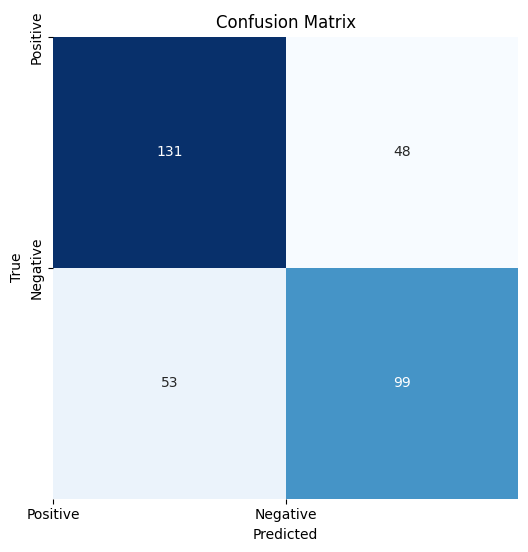

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Função para plotar matriz de confusão
def plot_confusion_matrix(cm, labels):
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xticks(np.arange(len(labels)), labels)
    plt.yticks(np.arange(len(labels)), labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')

# Obtendo as previsões no conjunto de teste
y_pred_probs = model.predict(X_test)
y_pred = np.round(y_pred_probs).astype(int)

# Calculando a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Invertendo a ordem das classes
cm = np.flip(cm, axis=0)
cm = np.flip(cm, axis=1)

# Definindo as classes invertidas
labels = ['Positive', 'Negative']

# Plotando a matriz de confusão
plot_confusion_matrix(cm, labels)
plt.show()
